In [1]:
%load_ext autoreload
%autoreload 2

from plot_utils import pull_data, plot_2x2_avg
from run import ScriptArguments
from copy import deepcopy

def get_key(config):
    return (config.model_name)

In [2]:
api = 'togetherai'
seed_list = range(2)
model_name_list = ['meta-llama/Meta-Llama-3-70B', 'meta-llama/Meta-Llama-3-70B-Instruct-Turbo']
athropic_arg_list = []
for seed in seed_list:
    for model_name in model_name_list:
        athropic_arg_list.append(
            ScriptArguments(
                debug=False,
                api=api,
                seed=seed,
                model_name=model_name,
                w_range=[0, 10],
                x_range=[0, 1000],
                input_dim=3,
                pz_end=540,
                pz_start=2,
                pz_dist='uniform',
                pz_count=50,
                num_test_examples=30,
                device='cuda:1',
                dataset_type='default'
            )
        )

api = 'baseline'
seed_list = range(2)
model_name_list = ['KNN']
knn_args_list = []
for seed in seed_list:
    for model_name in model_name_list:
        knn_args_list.append(
            ScriptArguments(
                debug=False,
                api=api,
                seed=seed,
                model_name=model_name,
                w_range=[0, 10],
                x_range=[0, 1000],
                input_dim=3,
                pz_end=1000,
                pz_start=2,
                pz_dist='uniform',
                pz_count=100,
                num_test_examples=100,
                device='cuda:1',
                dataset_type='default'
            )
        )

a0219f832d687b01
f412cd4d672c2261
e862717e4787c79e
5da323bf114b99db
9888aa4845b0c69e
0e48a0171666186f


/home/zcai75/github/multiple-ascent/plot_utils.py:75: UserWarning: var(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1807.)
  dat_var = dat.flatten(0, 1).var(dim=0)


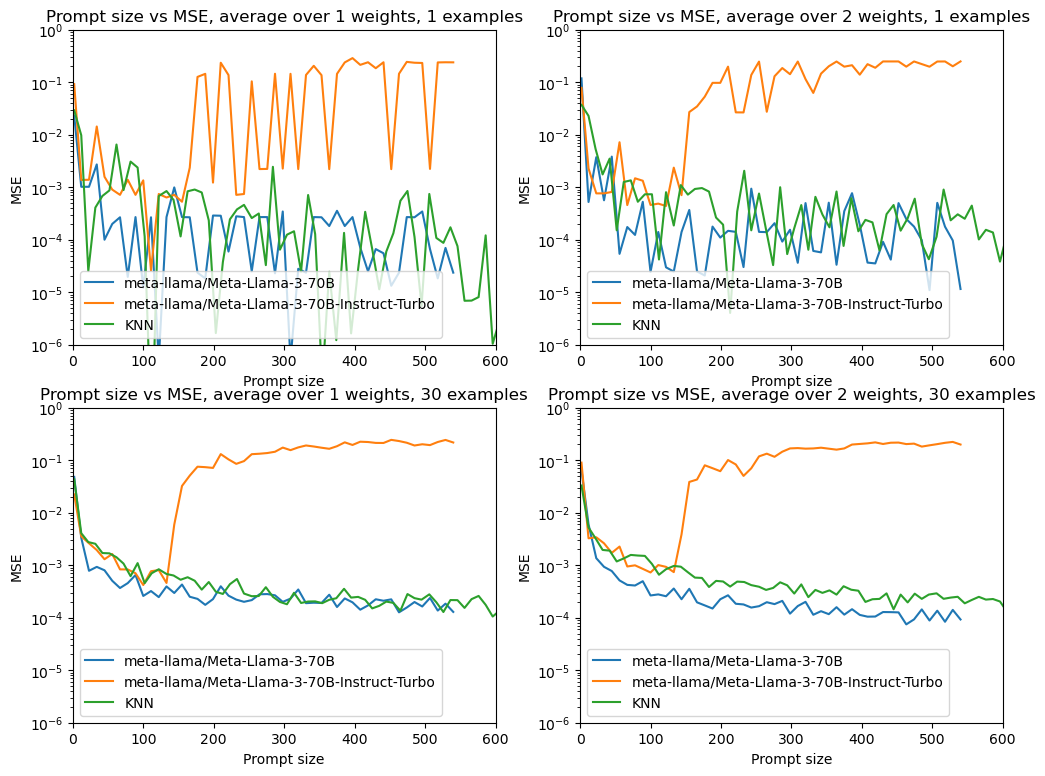

In [4]:
all_arg_list = deepcopy(athropic_arg_list + knn_args_list)
# for arg in all_arg_list:
#     arg.num_test_examples = 30

results, configs = pull_data(all_arg_list, get_key)
plot_2x2_avg(results, configs, x_list=[1, 30], w_list=[1, 2], logy=True, logx=False, decompose_mse=False, pz_range=[0, 600])